In [1]:
import numpy as np
import pandas as pd
import math
import mpmath as mp
import matplotlib.pyplot as plt

In [3]:
# --- Data from the slide ---
drug_A = np.array([113,129,125,116,113,128,115,121,124,112], dtype=float)
drug_B = np.array([133,122,129,140,135,135,129,131,137,132], dtype=float)

# --- Paired differences (B - A) ---
d = drug_B - drug_A
n = len(d)
mean_diff = d.mean()
sd_diff = d.std(ddof=1)
se_diff = sd_diff / math.sqrt(n)
t_stat = mean_diff / se_diff
df = n - 1

In [4]:
# Student t CDF and critical values
def t_cdf(x, v):
    x = mp.mpf(x)
    v = mp.mpf(v)
    t = x
    ib = mp.betainc(v/2, 1/2, 0, v/(v+t**2), regularized=True)
    if t >= 0:
        return 1 - 0.5*ib
    else:
        return 0.5*ib

def t_ppf_bisect(p, v, low=-50, high=50, tol=1e-8):
    low = mp.mpf(low); high = mp.mpf(high)
    while high - low > tol:
        mid = (low + high) / 2
        if t_cdf(mid, v) < p:
            low = mid
        else:
            high = mid
    return (low + high) / 2

p_two_tailed = float(2 * min(t_cdf(t_stat, df), 1 - t_cdf(t_stat, df)))

# 95% CI
alpha = 0.05
t_crit = float(t_ppf_bisect(1 - alpha/2, df))
ci_low = mean_diff - t_crit * se_diff
ci_high = mean_diff + t_crit * se_diff

# Effect size
cohens_dz = mean_diff / sd_diff

print(f"Paired t-test: t({df}) = {t_stat:.3f}, p(two-tailed) = {p_two_tailed:.4f}")
print(f"Mean difference (B - A) = {mean_diff:.2f} mmHg")
print(f"95% CI = [{ci_low:.2f}, {ci_high:.2f}] mmHg")
print(f"Cohen's dz = {cohens_dz:.3f}")

Paired t-test: t(9) = 4.192, p(two-tailed) = 0.0023
Mean difference (B - A) = 12.70 mmHg
95% CI = [5.85, 19.55] mmHg
Cohen's dz = 1.326


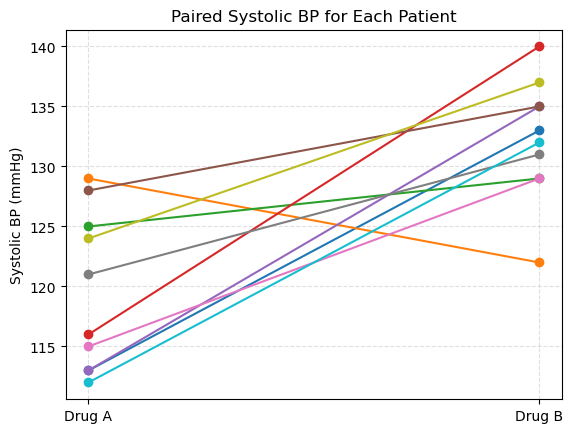

In [5]:
# Visualization 1: Paired line chart
plt.figure()
x = np.array([1,2])
for i in range(n):
    plt.plot(x, [drug_A[i], drug_B[i]], marker='o')
plt.xticks([1,2], ["Drug A", "Drug B"])
plt.title("Paired Systolic BP for Each Patient")
plt.ylabel("Systolic BP (mmHg)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

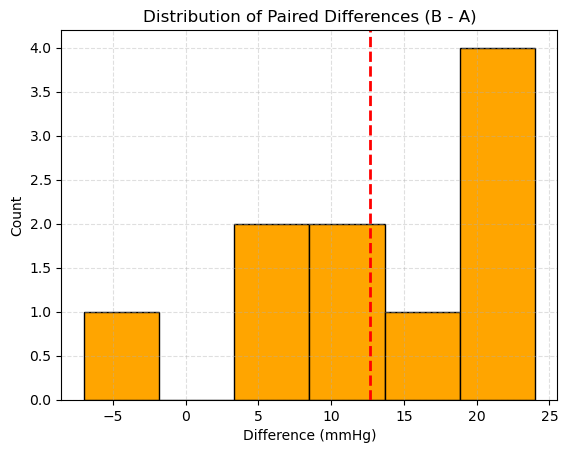

In [6]:
# Visualization 2: Histogram of differences
plt.figure()
plt.hist(d, bins=6, edgecolor='black', color='orange')
plt.axvline(mean_diff, linestyle='--', linewidth=2, color='red')
plt.title("Distribution of Paired Differences (B - A)")
plt.xlabel("Difference (mmHg)")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

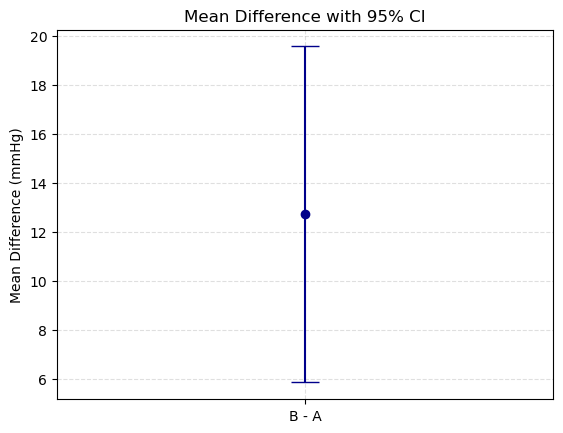

In [7]:
# Visualization 3: Mean difference with 95% CI
plt.figure()
plt.errorbar([0], [mean_diff], yerr=t_crit*se_diff, fmt='o', capsize=10, color='darkblue')
plt.xticks([0], ["B - A"])
plt.ylabel("Mean Difference (mmHg)")
plt.title("Mean Difference with 95% CI")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()